**Segundo parcial SIS 420**

**Nombre: Yavo Chavez Abigail Zulma**

**Carrera: Ingenieria en diseño y animación digital**  

**Numero del dataset 111 "Predecir la pureza y el precio de la miel"**

Este conjunto de datos describe diferentes características de muestras de miel. Cada muestra de miel tiene varias propiedades medidas, que incluyen:

- **Puntuación de color (CS)**: Indica cuán clara u oscura es la miel, en una escala de 1 a 10.
- **Densidad**: Indica cuán densa es la miel, medida en gramos por centímetro cúbico a 25°C.
- **Contenido de agua (WC)**: El porcentaje de agua en la miel.
- **pH**: Mide cuán ácida o básica es la miel.
- **Conductividad eléctrica (CE)**: Mide la capacidad de la miel para conducir electricidad.
- **Nivel de fructosa (F)**: La cantidad de fructosa presente en la miel.
- **Nivel de glucosa (G)**: La cantidad de glucosa presente en la miel.
- **Análisis de polen**: Indica la fuente floral de la miel (por ejemplo, trébol, flores silvestres, azahar, etc.).
- **Viscosidad**: Indica cuán espesa es la miel, medida en centipoise.
- **Pureza**: La variable objetivo que representa cuán pura es la miel.
- **Precio**: El precio de la miel calculado en función de las otras características.

El conjunto de datos incluye medidas físicas y químicas de la miel, así como información sobre su origen floral, pureza y precio. Estas características se pueden usar para analizar la calidad y el valor de diferentes muestras de miel.


##**Precesamiento de datos**

In [1]:
# Plotting library
from matplotlib import pyplot
# se utiliza para el manejo de rutas y directorios.
import os
# Calculo cientifico y vectorial para python
import numpy as np
# Librerias para graficar
import matplotlib.pyplot as plt
import pandas as pd
# Modulo de optimización de scipy
from scipy import optimize
#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import joblib

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Obtenemos los datos
data = pd.read_csv('/content/drive/MyDrive/Dataset Machine learning/honey_purity_dataset.csv', delimiter=',')
data

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62
...,...,...,...,...,...,...,...,...,...,...,...
247898,1.98,1.29,17.90,4.82,0.89,36.10,34.69,Rosemary,8261.63,1.00,754.98
247899,6.18,1.67,19.54,4.91,0.85,31.15,20.82,Acacia,6939.39,1.00,543.41
247900,7.78,1.49,15.78,5.69,0.73,44.60,44.07,Chestnut,4139.79,0.64,615.46
247901,5.78,1.74,14.96,6.81,0.83,47.19,37.79,Avocado,4417.74,0.97,949.32


In [5]:
# Información del dataset
print(data.info())

# Descripción estadística
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB
None
                  CS        Density             WC             pH  \
count  247903.000000  247903.000000  247903.000000  247903.000000   
mean        5.500259       1.535523      18.502625       4.996047   
std         

In [6]:
data=data.drop('Pollen_analysis', axis=1)

In [7]:
# Comprobar si hay valores faltantes
print(data.isnull().sum())

CS           0
Density      0
WC           0
pH           0
EC           0
F            0
G            0
Viscosity    0
Purity       0
Price        0
dtype: int64


###**Normalizacion de datos**
StandardScaler es una técnica que ajusta los datos para que sigan una distribución uniforme. Para hacerlo, resta la media y divide por la desviación estándar de cada característica de los datos. Esto hace que los datos tengan una media de 0 y una desviación estándar de 1, facilitando su análisis y procesamiento.

In [8]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Ajustar y transformar los datos
scaled_data = scaler.fit_transform(data)

# Convertir los datos escalados de vuelta a un DataFrame
df = pd.DataFrame(scaled_data, columns=data.columns)

# Mostrar el DataFrame escalado
df

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
0,-1.037132,1.141911,1.210410,0.896054,-0.690263,0.467824,0.156235,-0.369907,-1.036256,0.215867
1,1.530390,1.514602,-0.267465,1.526222,-1.553653,0.367314,0.264174,0.381200,0.470022,-0.894405
2,-0.343207,1.621085,1.391809,1.602397,0.000449,-0.866529,0.257255,0.460435,-1.179711,0.191897
3,-1.438066,-0.721543,-0.504885,-0.682831,-0.344907,-0.398639,-0.602109,0.576066,1.259026,1.505184
4,0.235064,-1.520166,0.300743,-0.121912,1.727230,-0.614677,1.386467,-0.255506,1.259026,-0.694215
...,...,...,...,...,...,...,...,...,...,...
247898,-1.357108,-1.307200,-0.160759,-0.121912,1.554552,0.130481,0.302921,1.021583,1.259026,0.685589
247899,0.262050,0.715979,0.276734,-0.059587,0.863839,-0.441385,-1.616463,0.483153,1.259026,-0.219998
247900,0.878871,-0.242369,-0.726299,0.480558,-1.208297,1.112472,1.600962,-0.656872,-1.323166,0.088399
247901,0.107844,1.088670,-0.945046,1.256150,0.518483,1.411691,0.731911,-0.543688,1.043843,1.517426


In [10]:
  _,data=train_test_split(df,test_size=0.2,random_state=42)#se esta reduciendo aun 20%

##**Aprendizaje No Supervisado**

 **CALCULO DE SILUETA PARA DISTINTOS NUMEROS DE CLUSTER MAS OPTIMO CON LA SILUETA**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


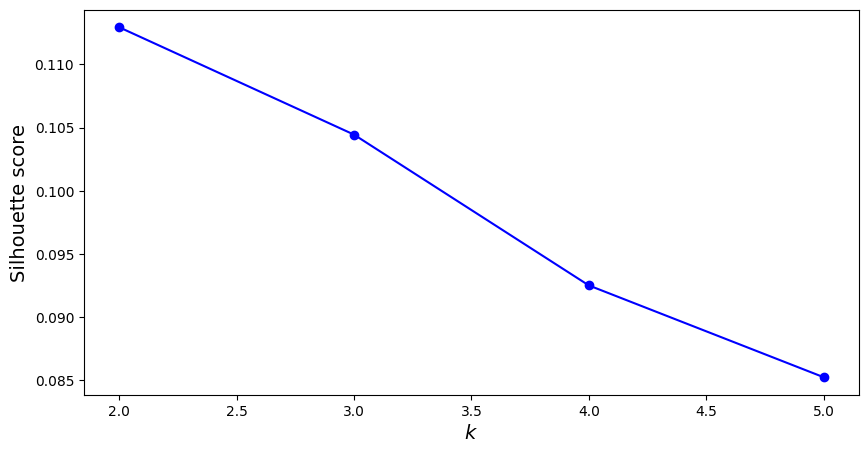

In [11]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Creamos una lista de modelos de KMeans ajustados para diferentes números de clusters
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(data) for k in range(2, 6)]

# Calculamos los coeficientes de silueta para cada modelo KMeans
silhouette_scores = [silhouette_score(data, model.labels_) for model in kmeans_per_k]

plt.figure(figsize=(10, 5))

# Graficar el coeficiente de silueta
plt.plot(range(2, 6), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)

plt.show()

##**Aplicar K-Means con el Número de Clusters Elegido**

Se considera 2 por que el mayor valor de silueta

In [19]:
from sklearn.cluster import KMeans

k = 2  # Números de clusters

# Instanciamos el modelo KMeans con el número de clusters k
kmeans = KMeans(n_clusters=k, random_state=42)

# Ajustar el modelo KMeans a los datos y transformar los datos en distancias de cada punto a los centroides de los clusters
X_digits_dist = kmeans.fit_transform(data)

y_pred = kmeans.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Los mas representyativos de cada cluster

In [20]:
#Imprimir las etiquetas
print(y_pred.shape)
print(y_pred)

(49581,)
[0 0 1 ... 1 1 1]


In [18]:
print(X_digits_dist.shape)
print(X_digits_dist)

(49581, 2)
[[2.62145036 3.78434885]
 [2.9145879  3.05940992]
 [3.24071688 3.00457651]
 ...
 [3.73706577 2.75376683]
 [3.40752937 2.32325341]
 [3.17626568 3.16859324]]


In [14]:
# Encontrar el índice del punto más cercano a cada centroide (cluster)
idxs = np.argmin(X_digits_dist, axis=0)

# Seleccionar los puntos representativos (centroides) de cada cluster
X_representative_digits = data.values[idxs]
# Crear un array con los valores del 0 al 1
y_representative_digits = np.arange(2)

# Mostramos las etiquetas de las muestras representativas
print(y_representative_digits.shape)
print(y_representative_digits)


(2,)
[0 1]


In [15]:
# Crear un array vacío para almacenar las etiquetas propagadas
y_train_propagated = np.empty(len(data))

# Iterar sobre cada cluster (i) generado por KMeans
for i in range(k):
    # Asignamos las etiquetas de los datos representativos del cluster (i) a todos los puntos del mismo cluster en data_norm
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [17]:
from sklearn.linear_model import LogisticRegression
# Creamos un clasificador de regresión logística con las etiquetas propagadas
log_reg3 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)
%time log_reg3.fit(data, y_train_propagated)
log_reg3.score(data, y_train_propagated)

CPU times: user 164 ms, sys: 85.7 ms, total: 250 ms
Wall time: 143 ms


0.9992537463947884